In [44]:
%run dcgan.ipynb
%run code.ipynb

import ipynb.fs.full.code as code
import ipynb.fs.full.dcgan as dcgan
import os

import warnings
warnings.filterwarnings('ignore')

In [45]:
enum = ['all', 'bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']

In [46]:
def dict_fakemons(path):

    p, d, fs = next(os.walk(path))
    gen_fakemons = {}
    
    for file in fs:
        file = file.replace('.pth', '')
        model = dcgan.load_gen(path, file)
        gen_fakemons[file] = model
        
    return gen_fakemons

In [47]:
def RunAll():

    path = 'data/'
    gen_fakemons = dict_fakemons('models/Generator/')

    while(len(gen_fakemons) < len(enum)):

        # choice of the type to do
        random_type = code.rand_type()

        while (code.check_if_done(random_type)):
            random_type = code.rand_type()

        print("Type(s) chosen for creating new Pokemon : " + random_type)

        # preparing the gan
        trainloader = code.create_trainloader(path, random_type)
        generator, discriminator = code.create_gen_dis()

        print("preparing done")

        # doing the gan
        res_gen, res_dis, images = code.ml(trainloader, generator, discriminator, epochs = 500)

        print("ml done")

        code.save_models(res_gen, res_dis, random_type)
        print("saving done")

        gen_fakemons[random_type] = res_gen
        print("adding gen to dict done\n\n\n\n\n")

    dcgan.delete_directory('to_delete')

    return gen_fakemons

Type(s) chosen for creating new Pokemon : dragon
preparing done
Epoch: 1 / 500 	Discriminator Loss: 0.010118 	Generator Loss: 0.072043
Epoch: 2 / 500 	Discriminator Loss: 0.002023 	Generator Loss: 0.044627
Epoch: 3 / 500 	Discriminator Loss: 0.001107 	Generator Loss: 0.035947
Epoch: 4 / 500 	Discriminator Loss: 0.000707 	Generator Loss: 0.027633
Epoch: 5 / 500 	Discriminator Loss: 0.000941 	Generator Loss: 0.036162
Epoch: 6 / 500 	Discriminator Loss: 0.000673 	Generator Loss: 0.023109
Epoch: 7 / 500 	Discriminator Loss: 0.000258 	Generator Loss: 0.018251
Epoch: 8 / 500 	Discriminator Loss: 0.000187 	Generator Loss: 0.015800
Epoch: 9 / 500 	Discriminator Loss: 0.000145 	Generator Loss: 0.016848
Epoch: 10 / 500 	Discriminator Loss: 0.000114 	Generator Loss: 0.013691
Epoch: 11 / 500 	Discriminator Loss: 0.000109 	Generator Loss: 0.012565
Epoch: 12 / 500 	Discriminator Loss: 0.000073 	Generator Loss: 0.020046
Epoch: 13 / 500 	Discriminator Loss: 0.000063 	Generator Loss: 0.011212
Epoch: 14

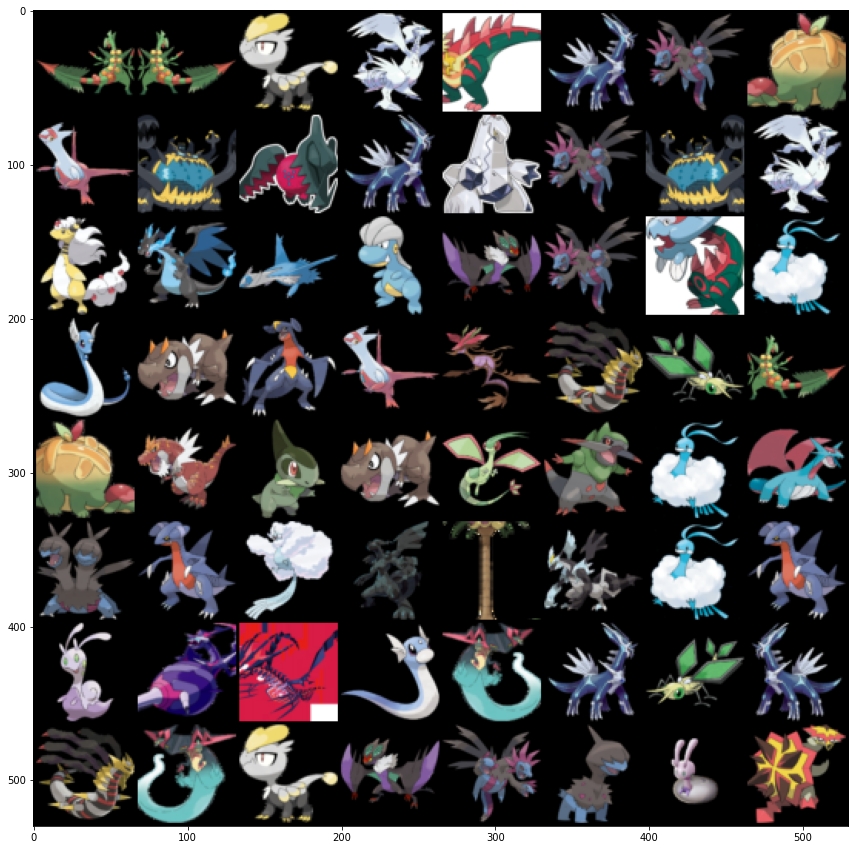

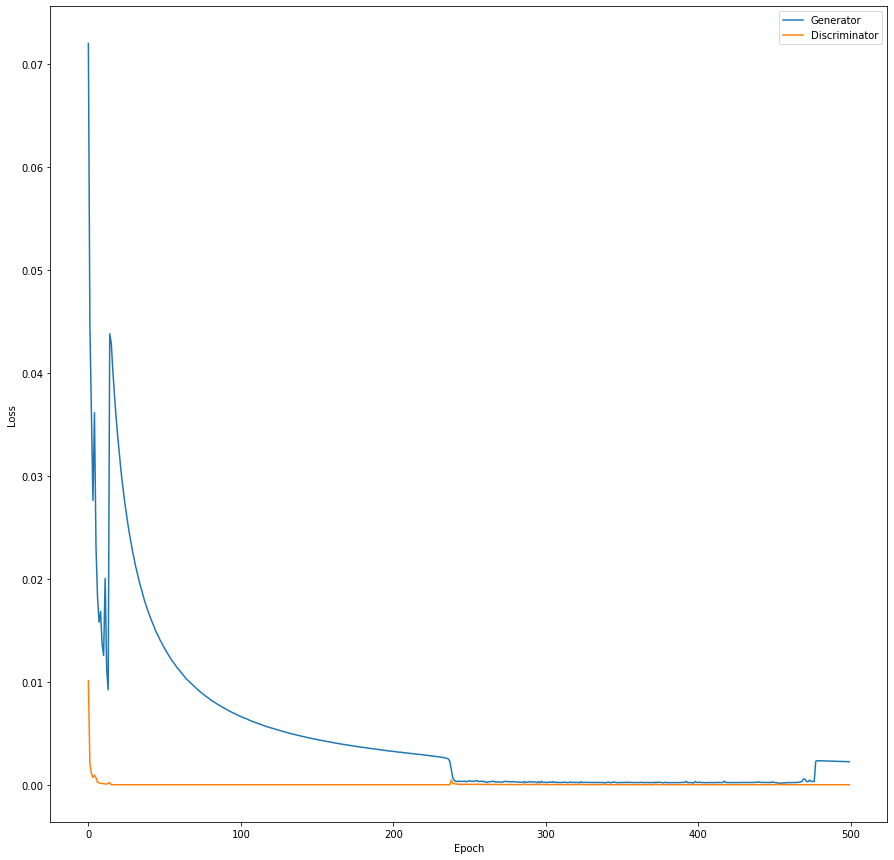

ml done
saving done
adding gen to dict done





Type(s) chosen for creating new Pokemon : fire
preparing done
Epoch: 1 / 500 	Discriminator Loss: 0.008309 	Generator Loss: 0.070477
Epoch: 2 / 500 	Discriminator Loss: 0.001026 	Generator Loss: 0.045951
Epoch: 3 / 500 	Discriminator Loss: 0.000530 	Generator Loss: 0.037745
Epoch: 4 / 500 	Discriminator Loss: 0.000397 	Generator Loss: 0.033303
Epoch: 5 / 500 	Discriminator Loss: 0.000556 	Generator Loss: 0.033246
Epoch: 6 / 500 	Discriminator Loss: 0.000329 	Generator Loss: 0.029787
Epoch: 7 / 500 	Discriminator Loss: 0.000149 	Generator Loss: 0.021980
Epoch: 8 / 500 	Discriminator Loss: 0.000110 	Generator Loss: 0.019489
Epoch: 9 / 500 	Discriminator Loss: 0.000099 	Generator Loss: 0.016304
Epoch: 10 / 500 	Discriminator Loss: 0.000086 	Generator Loss: 0.016214
Epoch: 11 / 500 	Discriminator Loss: 0.000065 	Generator Loss: 0.014263
Epoch: 12 / 500 	Discriminator Loss: 0.000138 	Generator Loss: 0.015487
Epoch: 13 / 500 	Discriminator Los

KeyboardInterrupt: 

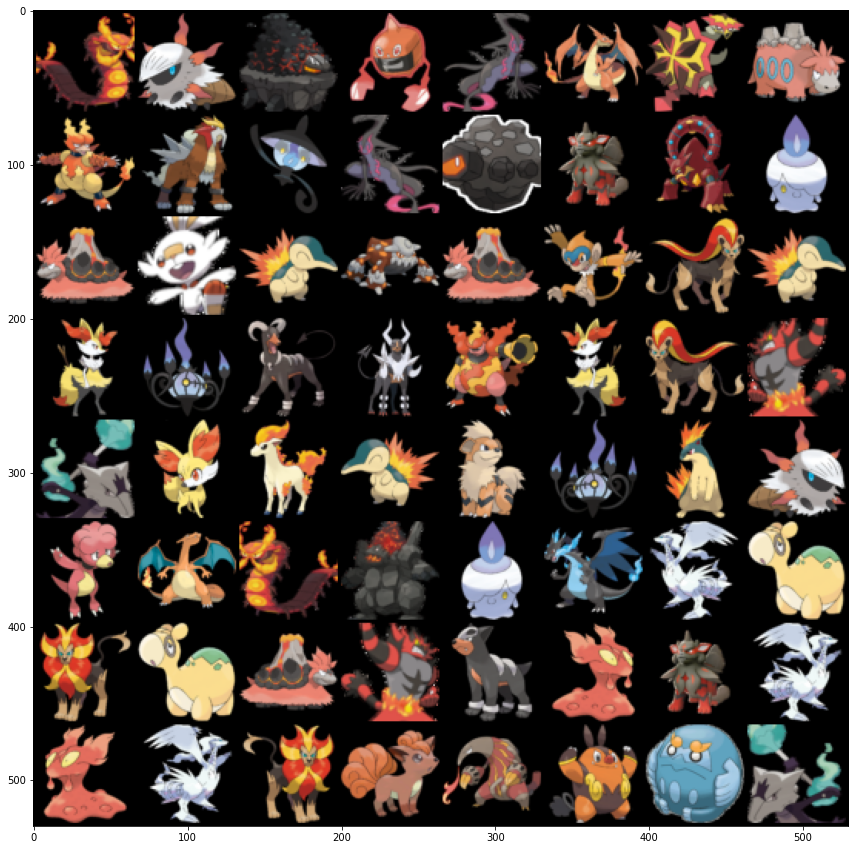

In [48]:
gen_fakemons = RunAll()